In [46]:
import numpy as np
import pandas as pd

In [47]:
# 붓꽃 품종 데이터를 이용해서 품종 분류하기

from sklearn.datasets import load_iris

### 붓꽃 품종 데이터
# - 품종 : setosa, versicolor, virginica
# - sepal length : 꽃받임 길이
# - sepal width : 꽃받임 폭
# - petal length : 꽃잎 길이
# - petal width : 꽃잎 폭

iris = load_iris()
print(iris)

###
# print(iris.DESCR)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# 데이터에 따른 품종 변화
## 1. K-최근접이웃(KNN, 이웃값 조정)
## 2. 로지스틱 회귀분류(이진분류)
## 3. 로지스틱 회귀분류(다중분류)

In [48]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
iris_input = iris["data"]
iris_input

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
iris_target = iris["target"]
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input, test_input, train_target, test_target = \
    train_test_split(iris_input, iris_target, random_state=42)
    
### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(112, 4)
(112,)
(38, 4)
(38,)


## 1. KNN

##### n_neighbors=5

In [53]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()

kn.fit(train_input, train_target)

print("훈련 = ", kn.score(train_input, train_target))
print("테스트 = ", kn.score(test_input, test_target))

훈련 =  0.9588588220888943
테스트 =  0.9835594886922321


##### n_neighbors= 수 조정하면서 최적의 이웃값 갯수 찾기

In [54]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=4)

kn.fit(train_input, train_target)

print("훈련 = ", kn.score(train_input, train_target))
print("테스트 = ", kn.score(test_input, test_target))

### (해석)

# 과소적합 발생
# - 훈련모델을 복잡하게 만들어 평가결과를 높이는 방법 사용
# - 이웃의 갯수를 5 -> 4로 작게 하여 이웃의 비교대상을 압축시키고,
# - 훈련의 집중도와 정확도를 높임

훈련 =  0.9657156850740786
테스트 =  0.9906588003933137


In [55]:
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
ss = StandardScaler()

### 스스로 표준점수 생성
ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

### 샘플 5개 행 출력해 보기
train_scaled[:5]

array([[-1.01827123,  1.2864604 , -1.39338902, -1.3621769 ],
       [-0.7730102 ,  2.43545215, -1.33550342, -1.49647603],
       [-0.03722712, -0.78172474,  0.74837808,  0.92090833],
       [ 0.20803391,  0.8268637 ,  0.4010645 ,  0.51801093],
       [ 1.06644751,  0.13746866,  0.51683569,  0.3837118 ]])

## 2.로지스틱 회귀분류 모델

In [56]:
### K-최근접이웃분류 모델로 테스트

### 라이브러리 생성
from sklearn.neighbors import KNeighborsClassifier

### 클래스(모델) 생성
kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)

### 훈련데이터 정확도
print(kn.score(train_scaled, train_target))

### 테스트데이터 정확도
print(kn.score(test_scaled, test_target))

0.9464285714285714
1.0


In [57]:
## 상위 5개 예측하기
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

# [[실제값, 예측값], [실제값, 예측값]]
import numpy as np

np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))

[1 0 2 1 1]
[1 0 2 1 1]


array([[1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1]])

In [58]:
### 각 행의 범주들의 확률값 확인

proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [59]:
### 5개의 데이터의 이웃들 확인하기
# - 각 행마다 이웃이 3개씩

distances, indexes = kn.kneighbors(test_scaled[:5])
print(indexes)

for test_data in test_scaled[:5] :
    distances, indexes = kn.kneighbors([test_data])
    print(train_target[indexes])


[[ 71  31 107]
 [ 40   6   5]
 [ 16  98  13]
 [ 71  82  78]
 [ 84  72  10]]
[[1 1 1]]
[[0 0 0]]
[[2 2 2]]
[[1 1 1]]
[[1 1 1]]


### 3-1 로지스틱 회귀 이진분류

##### - 1) 시그모이드 함수 사용(setosa, versicolor)

In [60]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
### 이진분류 방식은 2개의 범주만 사용 가능합니다.
# - 기존 데이터에서 2개(setosa과 versicolor) 범주만 추출하여 사용
# 독립변수명 : train_setosa_versicolor
# 종속변수명 : target_setosa_versicolor

target_setosa_versicolor = train_target[(train_target == 0) | (train_target == 1)]
target_setosa_versicolor.shape

train_setosa_versicolor = train_scaled[(train_target == 0) | (train_target == 1)]
train_setosa_versicolor.shape

(74, 4)

In [62]:
### 이진분류 하기
### 사용할 패키지 불러들이기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_setosa_versicolor, target_setosa_versicolor)
lr.score(train_setosa_versicolor, target_setosa_versicolor)

1.0

In [63]:
# 예측 상위 5개
lr.predict(train_setosa_versicolor[:5])

array([0, 0, 1, 1, 0])

In [64]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_setosa_versicolor[:5]))

[[0.98638718 0.01361282]
 [0.99584222 0.00415778]
 [0.04291844 0.95708156]
 [0.00889086 0.99110914]
 [0.98672414 0.01327586]]


In [65]:
### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

[0 1]


In [66]:
### 계수(또는 가중치) 및 y절편값 조회하기
print(lr.coef_)
print(lr.intercept_)

[[ 0.9579382  -1.15499708  1.62543353  1.47075842]]
[2.44655599]


In [67]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회하기
decisions = lr.decision_function(train_setosa_versicolor[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-4.2830373  -5.47860689  3.10458708  4.71380033 -4.30844279]
[0.01361282 0.00415778 0.95708156 0.99110914 0.01327586]


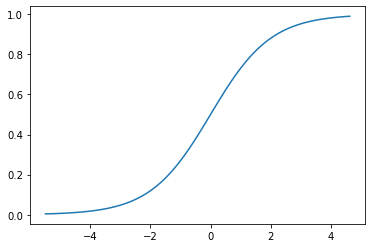

In [68]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
### 실제 사용시
### np.aragne(decisions.min(), decisions.max())
z = np.arange(decisions.min(), decisions.max(), 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

##### - 2) 시그모이드 함수 사용(versicolor, virginica)

In [69]:
### 이진분류 방식은 2개의 범주만 사용 가능합니다.
# - 기존 데이터에서 2개(versicolor, virginica) 범주만 추출하여 사용
# 독립변수명 : train_versicolor_virginica
# 종속변수명 : target_versicolor_virginica

target_versicolor_virginica = train_target[(train_target == 1) | (train_target == 2)]
target_versicolor_virginica.shape

train_versicolor_virginica = train_scaled[(train_target == 1) | (train_target == 2)]
train_versicolor_virginica.shape

(77, 4)

In [70]:
lr = LogisticRegression()
lr.fit(train_versicolor_virginica, target_versicolor_virginica)
lr.score(train_versicolor_virginica, target_versicolor_virginica)

0.948051948051948

In [71]:
# 예측 상위 5개
print(lr.predict(train_setosa_versicolor[:5]))

### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

[1 1 1 1 1]
[1 2]


In [72]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_versicolor_virginica[:5]))

[[0.20848157 0.79151843]
 [0.80602878 0.19397122]
 [0.72979629 0.27020371]
 [0.97170547 0.02829453]
 [0.54247629 0.45752371]]


In [73]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회하기
decisions = lr.decision_function(train_versicolor_virginica[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[ 1.33410252 -1.42440965 -0.99358929 -3.53638413 -0.17031567]
[0.79151843 0.19397122 0.27020371 0.02829453 0.45752371]


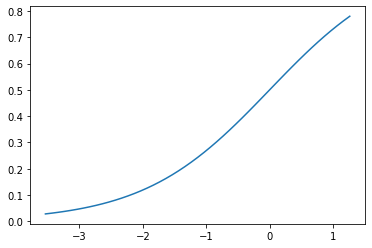

In [74]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
### 실제 사용시
### np.aragne(decisions.min(), decisions.max())
z = np.arange(decisions.min(), decisions.max(), 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

##### - 3) 시그모이드 함수 사용(setosa, virginica)

In [75]:
### 이진분류 방식은 2개의 범주만 사용 가능합니다.
# - 기존 데이터에서 2개(setosa, virginica) 범주만 추출하여 사용
# 독립변수명 : train_setosa_virginica
# 종속변수명 : target_setosa_virginica

target_setosa_virginica = train_target[(train_target == 0) | (train_target == 2)]
target_setosa_virginica.shape

train_setosa_virginica = train_scaled[(train_target == 0) | (train_target == 2)]
train_setosa_virginica.shape

(73, 4)

In [76]:
lr = LogisticRegression()
lr.fit(train_setosa_virginica, target_setosa_virginica)
lr.score(train_setosa_virginica, target_setosa_virginica)

1.0

In [77]:
# 예측 상위 5개
print(lr.predict(train_setosa_virginica[:5]))

### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

[0 0 2 0 0]
[0 2]


In [78]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_setosa_virginica[:5]))

[[0.98893001 0.01106999]
 [0.99436886 0.00563114]
 [0.02427132 0.97572868]
 [0.98620647 0.01379353]
 [0.98473316 0.01526684]]


In [79]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회하기
decisions = lr.decision_function(train_setosa_virginica[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-4.49238573 -5.17379545  3.69388916 -4.26966585 -4.16668744]
[0.01106999 0.00563114 0.97572868 0.01379353 0.01526684]


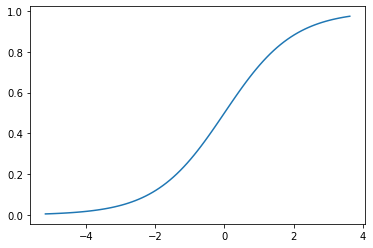

In [80]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
### 실제 사용시
### np.aragne(decisions.min(), decisions.max())
z = np.arange(decisions.min(), decisions.max(), 0.1)

### 시그모이드 공식 사용
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

### 3-2 로지스틱 회귀 다중분류
##### - 소프트맥스 함수 사용

In [81]:
### 규제강도 = 20
### 반복횟수 = 1000회
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print("훈련 = ", lr.score(train_scaled, train_target))
print("테스트 = ", lr.score(test_scaled, test_target))

훈련 =  0.9821428571428571
테스트 =  1.0


In [82]:
### 상위 5건으로 예측 진행
print(lr.predict(test_scaled[:5]))

[1 0 2 1 1]


In [83]:
### 전체 붓꽃별 확률 확인
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
print(lr.classes_)

[[0.    0.99  0.01 ]
 [0.995 0.005 0.   ]
 [0.    0.    1.   ]
 [0.    0.955 0.044]
 [0.    0.959 0.041]]
[0 1 2]


In [84]:
### 사용된 계수와 y절편
print(lr.coef_)
print(lr.intercept_)

[[-1.70140279  2.04602755 -3.96852069 -3.70539168]
 [ 1.29254313 -0.14914774 -1.65051652 -1.44353552]
 [ 0.40885966 -1.89687981  5.61903721  5.1489272 ]]
[-0.16133701  4.52621375 -4.36487674]


In [85]:
### z 산술연산 결과 확인하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=3))

[[ -3.833   4.211  -0.377]
 [ 13.073   7.845 -20.918]
 [-18.64    2.581  16.059]
 [ -4.188   3.627   0.561]
 [ -6.519   4.837   1.682]]


In [86]:
### 소프트맥스(softmax)
# 사용하는 패키지 : scipy.special
# 사용하는 모듈 : softmax

from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.99  0.01 ]
 [0.995 0.005 0.   ]
 [0.    0.    1.   ]
 [0.    0.955 0.044]
 [0.    0.959 0.041]]
